# 10000 Restaurant Reviews Dataset – High-Level Summary  

**Dataset Link:** [Kaggle - Restaurant Reviews Dataset](https://www.kaggle.com/datasets/joebeachcapital/restaurant-reviews/data)  

## Overview  
This dataset contains **10,000 customer reviews** of restaurants, sourced from Kaggle and GitHub. It is structured as a **CSV file with 8 columns**, covering details about the **restaurant, reviewer, review text, rating, and additional metadata**. The dataset is designed for **sentiment analysis, natural language processing (NLP), and business intelligence**.

## Key Features  
- **Review Text & Ratings** – Core fields for **sentiment analysis**, categorizing feedback as **positive, neutral, or negative**.  
- **Restaurant & Reviewer Information** – Identifies **which restaurant was reviewed** and **who wrote the review**, useful for **tracking trends and user behavior**.  
- **Metadata & Pictures** – Provides insights into **reviewer activity** (e.g., number of reviews/followers) and whether **photos were attached**.  
- **Timestamp** – Allows **trend analysis** over time, identifying shifts in restaurant performance.  
- **Total Reviews per Restaurant** – Helps gauge **restaurant popularity** by indicating how many reviews a restaurant has overall.  

# Step 1: Imports and Setup

In [1]:
# Upgrade pip and install necessary libraries
!pip install --upgrade pip setuptools wheel
!pip install pandas numpy matplotlib seaborn nltk wordcloud scikit-learn lxml

# Import standard libraries
import os
import re
import string
from collections import Counter
from typing import Any, List, Tuple


# Import third-party libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Import NLP tools
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

print("All libraries installed and set up successfully!")


All libraries installed and set up successfully!


[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ec2-user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Step 2: Loading and Exploring the Dataset

## Overview
Before using a dataset for text classification, it is important to evaluate its structure, quality, and relevance. A well-prepared dataset should contain labeled text data with minimal noise and a balanced target variable. In this step, we will load the dataset and examine its key characteristics to determine if it is suitable for classification.

### This function will:
- Check if the dataset file exists and load it into a Pandas DataFrame.
- Handle potential file loading errors, such as encoding issues.
- Display dataset shape, first few rows, and basic information.
- Validate the presence of the required columns (text and target labels).
- Identify missing values, duplicate entries, and unique values per column.
- Analyze the distribution of the target variable to assess balance and class proportions.

At the end of this step, you should be able to determine whether the dataset is ready for text classification or if adjustments are needed before preprocessing.

## Key Checks and Actions

### 1. Does the Dataset Contain Enough Data?
**Purpose:** Ensure that there are enough labeled text samples for meaningful classification.  
**Action:** Check the number of rows and columns using `df.shape`.  
**Questions to ask:**  
- Does the dataset contain enough examples for training and evaluation?
- If the dataset is very small, will the model be able to learn meaningful patterns?

### 2. Are the Text and Labels Properly Structured?
**Purpose:** Confirm that the text and target labels are in the correct format.  
**Action:** Preview the first few rows to check for formatting issues.  
**Questions to ask:**  
- Is the text column readable, or does it contain unwanted symbols, encoding errors, or missing values?
- Are the labels clearly defined, or do they need cleaning?

### 3. Are the Data Types Correct?
**Purpose:** Ensure that the text is stored as strings and that the target variable is categorical or numerical.  
**Action:** Use `df.info()` to check data types and memory usage.  
**Questions to ask:**  
- Is the text column stored as a string (`object` type in Pandas)?
- Is the target column categorical or numerical, or does it need conversion?

### 4. Are the Required Columns Present?
**Purpose:** Verify that the dataset includes both the text and target columns.  
**Action:** Check whether the dataset contains the specified text and target columns.  
**Questions to ask:**  
- Is there a column that contains the actual text data?
- Is there a well-defined target column for classification?

### 5. Does the Dataset Contain Missing Values?
**Purpose:** Determine if missing text or labels could impact model performance.  
**Action:** Identify missing values and decide whether to remove or fill them.  
**Questions to ask:**  
- Are there missing values in the text or target columns?
- If a large percentage of data is missing, is it still usable for classification?
- Should missing values be removed or replaced?

### 6. Are There Duplicate Entries?
**Purpose:** Ensure that duplicate text samples do not bias the model.  
**Action:** Count duplicate rows and determine if they should be removed.  
**Questions to ask:**  
- Are there identical reviews that might skew the results?
- Should duplicate entries be removed, or are they meaningful (e.g., identical reviews with different ratings)?

### 7. Is the Target Variable Balanced?
**Purpose:** Check if the dataset has a reasonable distribution of class labels.  
**Action:** Calculate the proportion of each class in the target variable.  
**Questions to ask:**  
- Are some classes significantly underrepresented?
- If one class appears much more frequently than others, will the model be biased?
- Should techniques like oversampling, undersampling, or class weighting be considered?

### 8. Is the Text Data Meaningful for Classification?
**Purpose:** Evaluate whether the dataset contains useful text for classification.  
**Action:** Scan through text samples to check for gibberish, repetitive content, or irrelevant text.  
**Questions to ask:**  
- Does the text contain useful information that differentiates between classes?
- Is the text too short or too repetitive to provide meaningful learning signals?
- Does the dataset require further cleaning before classification?

## Final Evaluation: Is This a Good Dataset for Text Classification?
After completing this step, you should be able to determine whether the dataset is suitable for text classification.

### The dataset is ready if:
- It has enough labeled text data.
- The text and target columns are clearly structured and correctly formatted.
- Missing values and duplicates are minimal or can be handled appropriately.
- The target variable is reasonably balanced.
- The text is meaningful and provides enough context for classification.

### The dataset may need adjustments if:
- There are too few samples to train a reliable model.
- The text column contains a lot of missing values, gibberish, or inconsistent formatting.
- The target labels are unclear, imbalanced, or missing.
- There are too many duplicate entries, reducing the dataset’s diversity.

By answering these questions and reviewing the dataset’s structure, you can make informed decisions about whether the dataset is ready for classification or requires further preprocessing before moving forward.


In [2]:
# Dataset configuration
# Modify this to match your dataset
DATASET_FILE = "Restaurant_Reviews.csv"  
TARGET_COLUMN = "Rating"  
TEXT_COLUMN = "Review"  

def load_and_explore_data(file_path=DATASET_FILE, target_column=TARGET_COLUMN, text_column=TEXT_COLUMN):
    """
    Loads a dataset from a CSV file and examines its structure for text classification suitability.

    - Checks file existence before loading.
    - Loads the dataset into a Pandas DataFrame.
    - Displays dataset shape, first few rows, and basic information.
    - Validates required columns, missing values, and duplicates.
    - Analyzes the distribution of the target variable.

    Parameters:
        file_path (str): Path to the dataset file.
        target_column (str): Name of the target column (e.g., "Sentiment").
        text_column (str): Name of the text data column (e.g., "Review").

    Returns:
        pd.DataFrame: The loaded dataset, or None if an issue occurs.
    """

    # Check if the file exists before loading
    if not os.path.exists(file_path):
        print(f"ERROR: File '{file_path}' not found. Please check the file path.")
        return None

    # Load dataset with UTF-8 encoding
    try:
        df = pd.read_csv(file_path, encoding="utf-8")
    except Exception as e:
        print(f"ERROR: Could not load file. {e}")
        return None

    print("\nDATA LOADED SUCCESSFULLY")
    print("=" * 50)

    # Display dataset shape
    print(f"Dataset Shape: {df.shape} (rows, columns)\n")

    # Preview first few rows
    print("First Few Rows:")
    print(df.head().to_string(index=False))

    # Display dataset information
    print("\nDataset Overview:")
    print(df.info())

    # Check if required columns exist
    missing_columns = [col for col in [target_column, text_column] if col not in df.columns]
    if missing_columns:
        print(f"ERROR: Missing columns: {', '.join(missing_columns)}")
        return None

    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("\nMissing Values Summary:")
        print(missing_values[missing_values > 0])
    else:
        print("\nNo missing values detected.")

    # Check for duplicate rows
    num_duplicates = df.duplicated().sum()
    print(f"\nDuplicate Rows: {num_duplicates}")

    # Target variable distribution
    print("\nTarget Variable Distribution (Proportion):")
    print(df[target_column].value_counts(normalize=True))

    return df

# Load and explore data
df = load_and_explore_data()



DATA LOADED SUCCESSFULLY
Dataset Shape: (10000, 7) (rows, columns)

First Few Rows:
     Restaurant             Reviewer                                                                                                                                                                                                                               Review Rating                Metadata            Time  Pictures
Beyond Flavours    Rusha Chakraborty The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\r\nGood place for a sate brunch. One can also chill with friends and or parents.\r\nWaiter Soumen Das was really courteous and helpful.      5  1 Review , 2 Followers 5/25/2019 15:54         0
Beyond Flavours Anusha Tirumalaneedi                                                                                     Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service    

# Step 3: Text Standardization and Cleaning  

## Overview  
Now that we have loaded and explored the dataset, the next step is to standardize and clean the text. The goal is to remove inconsistencies and irrelevant elements that could interfere with text classification. At the end of this step, you should evaluate whether the dataset is clean enough for classification or if further preprocessing is needed.  

This function will:  

- Convert text to lowercase for uniformity.  
- Expand contractions (e.g., `"can't"` → `"cannot"`) to standardize phrasing.  
- Remove URLs, HTML tags, and numbers that may not contribute meaningfully.  
- Normalize whitespace to avoid formatting inconsistencies.  
- Track and report the number of removed elements to assess the cleaning impact.  

## Key Checks and Actions  

### 1. Evaluating Text Standardization  
**Purpose:** Ensures that text is consistently formatted, making it easier for machine learning models to process.  
**Action:** Convert all text to lowercase and expand contractions.  
**Ask yourself:** Does the cleaned text retain its original meaning? Are contractions expanded correctly?  

### 2. Identifying and Removing Noise (URLs, HTML, Numbers, and Emojis)  
**Purpose:** Removes elements that do not contribute to text meaning or classification.  
**Action:** Count and remove URLs, HTML tags, standalone numbers, and emojis.  
**Ask yourself:** Was a large portion of the text made up of URLs, HTML tags, numbers, or emojis? If so, is the remaining content still meaningful?  

### 3. Ensuring Text Completeness  
**Purpose:** Verifies that cleaning does not remove too much useful information.  
**Action:** Track the number of reviews significantly altered by cleaning.  
**Ask yourself:** Are most reviews still informative after cleaning? If too much data was removed, should some elements (like numbers) be retained?  

### 4. Checking Dataset Readability  
**Purpose:** Determines if the text still makes sense and is useful for classification.  
**Action:** Print samples of the cleaned text to manually verify quality.  
**Ask yourself:** Does the cleaned text still convey useful information for classification? If not, what adjustments are needed?  

## 5. Deciding Next Steps  
At this stage, you should evaluate whether the dataset is suitable for classification or if further preprocessing is required.  

- If the cleaned text retains its meaning and structure, the dataset is ready for tokenization and feature extraction.  
- If too much data was removed, reconsider whether numbers or certain special characters should be kept.  
- If reviews contain a lot of noise, additional preprocessing (such as removing special characters or stopwords) may be necessary.  

By the end of this step, you should have a clearer understanding of your dataset’s quality and whether it is well-prepared for text classification.  


In [3]:
def standardize_text(df, text_column="Review", remove_numbers=True):
    """
    Cleans and standardizes text data to prepare it for classification.

    Steps:
    1. Convert text to lowercase.
    2. Expand contractions (e.g., "can't" → "cannot").
    3. Remove URLs, HTML tags, emojis, and optionally numbers.
    4. Normalize whitespace.
    5. Track and report removed elements.

    Parameters:
        df (pd.DataFrame): The dataset containing text data.
        text_column (str): The column name containing text data.
        remove_numbers (bool): Whether to remove numerical values (default: True).

    Returns:
        pd.DataFrame: A new DataFrame with cleaned text and cleaning statistics.
    """
    
    df = df.copy()  # Prevent modifying the original DataFrame
    df[text_column] = df[text_column].fillna('').astype(str)
    df["lowercased"] = df[text_column].str.lower()

    # Contraction mapping
    contractions_dict = {
        "can't": "cannot", "won't": "will not", "n't": " not",
        "'re": " are", "'s": " is", "'d": " would", "'ll": " will",
        "'t": " not", "'ve": " have", "'m": " am"
    }
    
    contractions_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, contractions_dict.keys())) + r')\b', re.IGNORECASE)

    def expand_contractions(text):
        """Replaces contractions with their expanded forms."""
        return contractions_pattern.sub(lambda x: contractions_dict[x.group(0).lower()], text)

    def remove_emojis(text):
        """Removes emojis using regex."""
        emoji_pattern = re.compile(
            "[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF"
            "\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF"
            "\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF"
            "\U00002702-\U000027B0\U000024C2-\U0001F251]+", flags=re.UNICODE)
        return emoji_pattern.sub('', text)

    def clean_text(text):
        """Cleans text and tracks removed elements."""
        if not isinstance(text, str) or not text.strip():
            return "", 0, 0, 0, 0, 0
    
        original_length = len(text.split())
    
        # Expand contractions
        text = expand_contractions(text)
    
        # Remove URLs
        url_matches = re.findall(r'http\S+|www\.\S+', text)
        url_count = len(url_matches)
        text = re.sub(r'http\S+|www\.\S+', '', text)
    
        # Remove HTML tags
        html_matches = re.findall(r'<.*?>', text)
        html_count = len(html_matches)
        text = re.sub(r'<.*?>', '', text)
    
        # Remove emojis
        text_no_emoji = remove_emojis(text)
        emoji_count = len(text) - len(text_no_emoji)
        text = text_no_emoji
    
        # Remove numbers (if specified)
        number_matches = re.findall(r'\b\d+\b', text)
        number_count = len(number_matches) if remove_numbers else 0
        if remove_numbers:
            text = re.sub(r'\b\d+\b', '', text)
    
        # Normalize whitespace
        text = re.sub(r'\s+', ' ', text).strip()
    
        cleaned_length = len(text.split())
        words_removed = max(original_length - cleaned_length, 0)
    
        return text, url_count, html_count, emoji_count, number_count, words_removed

    # Apply cleaning function
    results = df["lowercased"].apply(clean_text).apply(pd.Series)
    results.columns = ["cleaned_text", "urls_removed", "html_tags_removed", "emojis_removed", "numbers_removed", "words_removed"]

    df = df.join(results)

    # **Cleaning Summary**
    print("=" * 50)
    print("TEXT CLEANING SUMMARY")
    print("=" * 50)
    print(f"Total reviews processed: {len(df)}")
    print(f"URLs removed: {df['urls_removed'].sum()}")
    print(f"HTML tags removed: {df['html_tags_removed'].sum()}")
    print(f"Emojis removed: {df['emojis_removed'].sum()}")
    print(f"Numbers removed: {df['numbers_removed'].sum() if remove_numbers else 'Numbers were not removed'}")

    significantly_altered_reviews = (df["words_removed"] > (df["lowercased"].str.split().str.len() * 0.5)).sum()
    print(f"Reviews with significant text removed: {significantly_altered_reviews}")

     # **Top 5 Most Altered Reviews**
    print("\nTop 5 Reviews with the Most Words Removed:")
    for i, (_, row) in enumerate(df.nlargest(5, "words_removed").iterrows(), start=1):
        print("=" * 50)
        print(f"Sample {i}")
        print("=" * 50)
        print("\nOriginal:", row[text_column])
        print("Cleaned:", row["cleaned_text"])


    return df[["cleaned_text", "urls_removed", "html_tags_removed", "emojis_removed", "numbers_removed", "words_removed"]]

df_cleaned = standardize_text(df)
print(df_cleaned.head())


TEXT CLEANING SUMMARY
Total reviews processed: 10000
URLs removed: 3
HTML tags removed: 4
Emojis removed: 2116
Numbers removed: 7467
Reviews with significant text removed: 9

Top 5 Reviews with the Most Words Removed:
Sample 1

Original: # Gal Punjabi Di Review

I ordered Hara bhara kebab and cheese Garlic Naan from Zomato....

Delivery on time... And also packing was good..... I am impressed from packing....

➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖

Hara Kebab: This is my all time favorite starter from vegetarian menu.... This was perfectly cooked... Not oily... I loved the taste... 😍

Cheese Garlic Naan: As I am cheese lover... I order this... It was perfectly roasted....😍 😋

Salad was too good.....

➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖ ➖

Overall my experience was very good...

Food: 4.5 /5

Packing: 5/5

Quantity: 4/5

To know more about my food journey follow @lovewidfood on Instagram, Facebook and Zomato.
Cleaned: # gal punjabi di review i ordered hara bhara kebab and cheese garlic naan fro

## **Step 4: Tokenization of Cleaned Text**  

### **Overview**  
After standardizing and cleaning the text, the next step is to tokenize it. Tokenization is the process of breaking text into smaller units (sentences and words) that can be further processed for text classification.  

At the end of this step, you should evaluate whether the tokenized text maintains its structure and meaning and whether any additional preprocessing is needed before moving forward.  

This function will:  
- Split cleaned text into sentences.  
- Tokenize each sentence into individual words.  
- Store the results for further preprocessing or feature extraction.  
- Compute the total token count per review.  
- Display the top five longest tokenized reviews to verify correctness.  

## **Key Checks and Actions**  

### **1. Splitting Text into Sentences**  
- **Purpose:** Separates text into smaller meaningful units to preserve sentence structure.  
- **Action:** Use `sent_tokenize()` to break text into sentences.  

**Ask yourself:**  
- Do the sentences make sense, or are they being split incorrectly?  
- Does sentence splitting help maintain context for classification?  

### **2. Tokenizing Sentences into Words**  
- **Purpose:** Converts text into individual words, making it easier for models to analyze patterns.  
- **Action:** Use `RegexpTokenizer` to split sentences into words while preserving punctuation when needed.  

**Ask yourself:**  
- Are words tokenized correctly, or are meaningful words being broken apart?  
- Should punctuation be preserved or removed for classification purposes?  

### **3. Handling Edge Cases**  
- **Purpose:** Ensures that tokenization does not introduce errors due to empty or malformed text.  
- **Action:** Check if any text results in empty tokens and handle them appropriately.  

**Ask yourself:**  
- Are there reviews that result in empty token lists?  
- If so, should they be removed or replaced?  

### **4. Computing and Reviewing Token Counts**  
- **Purpose:** Helps confirm whether tokenization is working as expected before moving forward.  
- **Action:** Compute the total number of tokens per review and display the five longest tokenized reviews.  

**Ask yourself:**  
- Do the tokenized sentences and words still preserve the meaning of the original text?  
- Should stopwords or punctuation be removed in the next preprocessing step?  

### **5. Deciding Next Steps**  
At this stage, you should evaluate whether the tokenized text is suitable for feature extraction or if additional preprocessing is required.  

- If **the tokenization results maintain structure and meaning**, the dataset is ready for vectorization and model training.  
- If **the tokenized words include too much noise**, consider removing stopwords or applying stemming/lemmatization.  
- If **sentence splitting is not useful for the classification task**, consider using only word tokenization.  

By the end of this step, you should have a structured, tokenized dataset that is ready for further processing in a text classification pipeline.  


In [4]:
def tokenize_text(df: pd.DataFrame, text_column: str = "cleaned_text") -> pd.DataFrame:
    """
    Tokenizes text data by:
      - Splitting it into sentences.
      - Tokenizing each sentence into words.
      - Counting total tokens per review.
    
    Displays the top 5 longest tokenized reviews.

    Parameters:
        df (pd.DataFrame): DataFrame containing text data.
        text_column (str): Column name with text to tokenize.

    Returns:
        pd.DataFrame: A new DataFrame with added columns:
            - tokenized_sentences: List of sentences.
            - tokenized_words: List of tokenized words per sentence.
            - token_count: Total number of tokens per review.
    """
    if text_column not in df.columns:
        raise ValueError(f"Column '{text_column}' not found in DataFrame. Available columns: {list(df.columns)}")

    df = df.copy()  # Prevent modifying the original DataFrame
    tokenizer = RegexpTokenizer(r'\S+')  # Tokenizes based on non-whitespace

    def tokenize_entry(text: Any) -> Tuple[List[str], List[List[str]]]:
        """Splits text into sentences and tokenizes words in each sentence."""
        if pd.isna(text) or not isinstance(text, str) or not text.strip():
            return [], []
        sentences = sent_tokenize(text)  # Sentence tokenization
        tokenized_words = [tokenizer.tokenize(sentence) for sentence in sentences]
        return sentences, tokenized_words

    # Apply tokenization function to each text entry
    df["tokenized_sentences"], df["tokenized_words"] = zip(*df[text_column].apply(tokenize_entry))

    # Compute total token count per review
    df["token_count"] = df["tokenized_words"].apply(lambda tokens: sum(len(sentence) for sentence in tokens))

    # Display top 5 longest tokenized reviews
    top_reviews = df.nlargest(5, "token_count")

    print("\nTop 5 Longest Tokenized Reviews:")
    print("=" * 50)
    for i, (_, row) in enumerate(top_reviews.iterrows(), start=1):
        print(f"Review {i}:")
        print("=" * 50)
        print("Original Text:\n", row[text_column])
        print("\nTokenized Sentences:")
        for sentence in row["tokenized_sentences"]:
            print(" -", sentence)
        print("\nTokenized Words:")
        for tokens in row["tokenized_words"]:
            print(" -", tokens)
        print("Total Tokens:", row["token_count"])
        print("=" * 50)

    return df

df_tokenized = tokenize_text(df_cleaned)


Top 5 Longest Tokenized Reviews:
Review 1:
Original Text:
 hyderabadi daawat as the name suggests has some authentic hyderabadi food which you get to eat in the functions here in hyderabad! ever been to a hyderabadi daawat before? no not the hotel we are talking about a function, well if you have been to one then you definitely know how much a hyderabadi loves food and how much he spends on the menu! and here at hyderabadi daawat, the restaurant, you get the same splendid variety of dishes to enjoy! the hotel is very easy to locate! its on the main road...while coming from orr or gachibowli side it comes on the right side and if you are coming from miyapur side then it will be on your left! the restaurant has simple yet beautiful interiors, very calm and cozy place! they also have banquet hall and a conference hall and they also undertake catering orders for parties and functions! and after the "dastar" was set we sat down for the food and they first brought the yakhni shorba! shorba 

## **Step 5: Punctuation and Stopword Removal**  

### **Overview**  
After tokenizing the text, the next step is to remove punctuation and stopwords. While punctuation is often unnecessary for text classification, certain marks (such as `!` and `?`) may carry meaning depending on the task. Similarly, stopwords (e.g., "the," "and," "is") are commonly removed as they do not contribute significant value for classification. However, in some cases, retaining stopwords might be beneficial.  

At the end of this step, evaluate whether punctuation and stopword removal improves the dataset’s quality for classification or if adjustments are needed.  

This function will:  
- Remove punctuation from tokenized words.  
- Optionally retain punctuation that may carry meaning (e.g., `!`, `?`).  
- Remove common stopwords (e.g., "the," "and," "is").  
- Store the cleaned tokens for further preprocessing.  
- Display sample text before and after cleaning to verify correctness.  

## **Key Checks and Actions**  

### **1. Removing Punctuation**  
- **Purpose:** Eliminates symbols that do not contribute meaningfully to classification.  
- **Action:** Remove all punctuation, except for selected marks like `!` and `?` if they are considered important.  

**Consider:**  
- Does punctuation removal improve the readability and consistency of the dataset?  
- Should punctuation like `!` and `?` be retained because they indicate sentiment or emphasis?  

### **2. Removing Stopwords**  
- **Purpose:** Reduces common words that do not add distinguishing value for classification.  
- **Action:** Remove words like "the," "is," and "and" using a predefined stopword list.  

**Consider:**  
- Does stopword removal improve classification by reducing unnecessary tokens?  
- If removing stopwords eliminates too much information, should some stopwords be retained?  

### **3. Handling Edge Cases**  
- **Purpose:** Ensures that punctuation and stopword removal does not strip too much meaningful content.  
- **Action:** Check for cases where removing punctuation and stopwords leaves text too short or empty.  

**Consider:**  
- Does the remaining text after removal still contain enough information for classification?  
- Are some samples reduced to too few words, making them less useful?  

### **4. Reviewing Cleaning Output**  
- **Purpose:** Helps confirm whether punctuation and stopword removal preserves important text structure.  
- **Action:** Print sample text before and after cleaning to compare the impact.  

**Consider:**  
- Do the cleaned tokens still contain enough meaningful words for classification?  
- Should stopword removal be adjusted to retain more useful words?  

### **5. Deciding Next Steps**  
At this stage, evaluate whether the cleaned text is suitable for feature extraction or if further refinements are needed.  

- If **the cleaned text maintains its meaning and structure**, the dataset is ready for vectorization and model training.  
- If **removing punctuation or stopwords significantly reduces useful information**, reconsider which stopwords and punctuation should be retained.  
- If **some text samples become too short or meaningless**, evaluate whether removing stopwords is beneficial for the specific classification task.  

By the end of this step, determine whether punctuation and stopword removal has improved the dataset’s quality for text classification or if further refinements are needed.


In [5]:
def remove_punctuation_and_stopwords(df, tokens_column="tokenized_words", retain_important=True, important_punct={"!", "?"}):
    """
    Removes punctuation and common stopwords from tokenized words.
    
    It creates additional columns for different text versions and counts of removed elements.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing tokenized words.
        tokens_column (str): Column with lists of tokenized words.
        retain_important (bool): If True, keeps selected punctuation (e.g., "!", "?").
        important_punct (set): Set of punctuation marks to retain.

    Returns:
        pd.DataFrame: A modified DataFrame with additional columns for cleaned text.
    """
    df = df.copy()  # Prevent modifying the original DataFrame
    stop_words = set(stopwords.words('english'))  # Load stopwords

    def flatten_list(nested_list):
        """Flattens a list of lists into a single list."""
        if isinstance(nested_list, list):
            return [item for sublist in nested_list for item in (sublist if isinstance(sublist, list) else [sublist])]
        return nested_list

    def process_tokens(tokens):
        """Removes punctuation and stopwords from a list of tokens."""
        tokens = flatten_list(tokens)  # Ensure we are working with a flat list
        
        if not isinstance(tokens, list):  # Ensure tokens are a list
            return [], [], []
        
        removed_punct = []
        cleaned_tokens = []
        
        for token in tokens:
            new_token = "".join(
                char if char not in string.punctuation or (retain_important and char in important_punct) else ""
                for char in token
            )
            removed_punct.extend([char for char in token if char in string.punctuation and char not in important_punct])
            if new_token:
                cleaned_tokens.append(new_token)

        filtered_tokens = [word for word in cleaned_tokens if word.lower() not in stop_words]
        return cleaned_tokens, removed_punct, filtered_tokens

    # Apply processing
    df[['words_no_punct', 'removed_punct', 'words_no_stop']] = df[tokens_column].apply(
        lambda tokens: pd.Series(process_tokens(tokens))
    )

    # Create an original text column (flatten before joining)
    df['original_text'] = df[tokens_column].apply(lambda tokens: " ".join(flatten_list(tokens)) if isinstance(tokens, list) else "")

    # Calculate removal counts
    df['punct_removed_count'] = df['removed_punct'].apply(len)
    df['stop_removed_count'] = df['words_no_punct'].apply(len) - df['words_no_stop'].apply(len)
    df['total_modifications'] = df['punct_removed_count'] + df['stop_removed_count']

    # Show top modified samples
    top_modified = df.sort_values(by='total_modifications', ascending=False).head(5)
    print("\nTop Modified Samples:")

    for i, (idx, row) in enumerate(top_modified.iterrows(), start=1):
        print("=" * 50)
        print(f"Sample {i}:")
        print("=" * 50)
        print(f"Original: {row['original_text']}")
        print(f"No Punctuation: {' '.join(row['words_no_punct'])}")
        print(f"No Stopwords: {' '.join(row['words_no_stop'])}")
        print(f"Punctuation Removed: {row['punct_removed_count']}, Stopwords Removed: {row['stop_removed_count']}, Total Modifications: {row['total_modifications']}")
    
    return df

df_processed = remove_punctuation_and_stopwords(df_tokenized)



Top Modified Samples:
Sample 1:
Original: a peaceful n quite place is something u want after a hectic schedule where u can spend some quality time with friends or family that relaxes u for sometime.....even i wanted to relax n take a break from my hectic schedule.......one or two days later few of my friends invited me to this place n was delighted to know this place n it was perfect for me as i exactly wanted to head to a place similar to this......believe me guyz it is an awsome place n definitely u will fall in love with it....... lets begin with drinks first they served so many mocktails like orange delight had amazing blend of vit c to give u the boost in this hot weather cucumber n mint very refreshing to beat the heat n taste was good too virgin pina colada not good as it had coconut n pineapple flavor n i am not a fan of coconut flavor especially in drinks,so it was a no no for me black currant tasted good spicy tango had a tinge of masala like jaljeera n a dash of spiciness d

## **Step 6: Lemmatization**  

### **Overview**  
After punctuation and stopwords have been removed, the next step is to normalize words using **lemmatization**. This process helps reduce words to their dictionary base forms, ensuring consistency in text classification.  

At the end of this step, you should evaluate whether lemmatization improves the dataset or alters too much useful information.  

This function will:  
- Apply **lemmatization** to reduce words to their dictionary form (e.g., "better" → "good").  
- Store the transformed version of the text.  
- Calculate how many words changed after lemmatization.  
- Display sample text before and after transformation for evaluation.  

## **Key Checks and Actions**  

### **1. Applying Lemmatization**  
- **Purpose:** Converts words to their dictionary root form while preserving meaning.  
- **Action:** Apply **WordNet Lemmatizer** to transform words.  

**Ask yourself:**  
- Does lemmatization help preserve the intended meaning?  
- Are some words incorrectly transformed?  

### **2. Tracking Changes**  
- **Purpose:** Measures the impact of lemmatization on the dataset.  
- **Action:** Count the number of words that changed after lemmatization.  

**Ask yourself:**  
- Are a significant number of words changing?  
- Is lemmatization making meaningful improvements?  

### **3. Reviewing Sample Outputs**  
- **Purpose:** Helps confirm whether lemmatization improves text quality for classification.  
- **Action:** Print sample words before and after transformation to compare changes.  

**Ask yourself:**  
- Does lemmatization retain the meaning of words while improving consistency?  
- Should adjustments be made before moving to feature extraction?  

### **4. Deciding Next Steps**  
At this stage, you should evaluate whether lemmatization improves the dataset for classification.  

- If **the transformed words maintain their meaning**, proceed to feature extraction.  
- If **too many words are unrecognizable**, consider whether lemmatization is necessary for the task.  
- If **words with different meanings are reduced to the same form**, review whether normalization is beneficial for classification.  

By the end of this step, you should have a standardized dataset where words are consistently formatted for text classification.  


In [6]:
def lemmatize(df, tokens_column="words_no_stop", verbose=True):
    """
    Applies WordNet Lemmatization to a list of tokens in each row.
    It then calculates how many tokens have changed after lemmatization
    and optionally displays the top 5 rows with the most changes.

    Parameters:
        df (pd.DataFrame): The dataset containing tokenized words.
        tokens_column (str): The column containing lists of tokenized words.
        verbose (bool): If True, prints the top modified samples.

    Returns:
        pd.DataFrame: A new DataFrame with an additional 'lemmatized' column and
                      a 'lemma_changes' column indicating the number of tokens changed.
    """
    # Ensure the column exists
    if tokens_column not in df.columns:
        raise ValueError(f"Column '{tokens_column}' not found in DataFrame.")

    df = df.copy()  # Avoid modifying the original DataFrame
    lemmatizer = WordNetLemmatizer()

    # Function to apply lemmatization
    def apply_lemmatization(words):
        return [lemmatizer.lemmatize(word) for word in words]

    # Apply lemmatization to the tokenized words
    df['lemmatized'] = df[tokens_column].apply(apply_lemmatization)

    # Count the number of changes per row
    df['lemma_changes'] = df.apply(
        lambda row: sum(1 for orig, lemma in zip(row[tokens_column], row['lemmatized']) if orig != lemma),
        axis=1
    )

    # Show top 5 modified samples if verbose is True
    if verbose:
        top_modified = df.sort_values(by='lemma_changes', ascending=False).head(5)
        print("\nTop 5 Modified Samples After Lemmatization:")
        for i, (idx, row) in enumerate(top_modified.iterrows(), start=1):
            print("=" * 50)
            print(f"Sample {i}:")
            print("=" * 50)
            print(f"Original Tokens: {row[tokens_column]}")
            print("=" * 50)
            print(f"Lemmatized Tokens: {row['lemmatized']}")
            print("=" * 50)
            print(f"Words Changed: {row['lemma_changes']}")

    return df

# Applying lemmatization to the processed dataset
df_lemmatized = lemmatize(df_processed)



Top 5 Modified Samples After Lemmatization:
Sample 1:
Original Tokens: ['time', 'year', 'cricket', 'fanactics', 'lookout', 'places', 'offering', 'sports', 'screenings', 'feel', 'almost', 'heartbroken', 'find', 'dedicated', 'sports', 'bar', 'town', 'worry', 'arena', 'eleven', 'woo', 'crowd', 'delightful', 'sportsthemed', 'decor', 'offering', 'bigscreen', 'match', 'telecasts', 'sports', 'coming', 'beautiful', 'rooftop', 'ambience', 'located', 'level', 'sln', 'terminus', 'mall', 'gachibowli', 'tagline', 'place', 'kebabs', 'beers', 'sports', 'incorporated', 'menu', 'well', 'setting', 'quite', 'aptly', 'menu', 'place', 'particularly', 'compact', 'serving', 'selective', 'indian', 'oriental', 'preparations', 'vegetarian', 'well', 'non', 'vegetarian', 'diets', 'sampling', 'vegetarian', 'appetizer', 'ala', 'carte', 'section', 'ended', 'calling', 'sizzling', 'veg', 'tikka', 'platter', 'masala', 'fries', 'turned', 'pretty', 'good', 'platter', 'came', 'different', 'tikkas', 'choice', 'namely', 'v

## **Step 8: Outlier Detection Based on Text Length**  

### **Overview**  
Outlier detection based on text length helps identify reviews that are significantly shorter or longer than typical entries. Extremely short texts may lack useful information, while very long texts could introduce noise or imbalance in the dataset.  

At the end of this step, you should evaluate whether outliers should be removed, modified, or handled separately.  

This function will:  
- Calculate the **number of tokens per review** to measure text length.  
- Define **dynamic thresholds** using the **5th and 95th percentiles** to detect unusually short or long texts.  
- Mark entries as **outliers** if their token count falls outside these thresholds.  
- Display summary statistics for token distribution.  
- Generate a **histogram** to visualize token count variation and highlight outliers.  
- Show **examples of short and long outliers** for manual review.  
- **Remove the outliers** from the dataset and return a cleaned version.  

## **Key Checks and Actions**  

### **1. Measuring Text Length**  
- **Purpose:** Determines the number of tokens per review.  
- **Action:** Count tokens in each entry to assess length variation.  

**Ask yourself:**  
- Does the dataset contain many extremely short or long reviews?  
- Should text length be normalized before classification?  

### **2. Defining Outlier Thresholds**  
- **Purpose:** Identifies text entries that are significantly different from the majority.  
- **Action:** Use the **5th percentile (lower bound)** and **95th percentile (upper bound)** as thresholds.  

**Ask yourself:**  
- Are the threshold values reasonable, or should they be adjusted?  
- Does the dataset require stricter or more lenient outlier detection?  

### **3. Marking, Counting, and Reviewing Outliers**  
- **Purpose:** Flags text entries that fall outside the defined thresholds.  
- **Action:**  
  - Label reviews as **outliers** if their token count is below or above the thresholds.  
  - Display the **total number of outliers detected**.  
  - Show **examples of short and long outliers** to help decide if they should be removed.  

**Ask yourself:**  
- How many reviews are flagged as outliers?  
- Do the flagged reviews contain valuable content?  
- Should outliers be removed, kept, or processed differently?  

### **4. Visualizing Token Count Distribution**  
- **Purpose:** Helps assess whether token length variation is normal or extreme.  
- **Action:** Plot a histogram showing text length distribution with threshold markers.  

**Ask yourself:**  
- Does the dataset contain an expected range of text lengths?  
- Should text length outliers be handled before classification?  

### **5. Removing Outliers and Finalizing the Dataset**  
- **Purpose:** Cleans the dataset by removing extreme-length reviews.  
- **Action:** Remove reviews that fall outside the threshold and return a cleaned DataFrame.  

**Ask yourself:**  
- How much data is removed after outlier filtering?  
- Does removing these reviews improve dataset quality?  
- Is the dataset still balanced after filtering?  

### **6. Deciding Next Steps**  
At this stage, you should determine whether handling text length outliers is necessary for classification.  

- If **outliers distort the dataset**, consider removing or adjusting them.  
- If **extremely short reviews lack meaningful information**, they may be excluded.  
- If **very long reviews dominate the dataset**, consider truncation or normalization.  

By the end of this step, you should have a clear understanding of how text length outliers affect your dataset and whether they need to be addressed before moving forward with text classification.  



Token Count Analysis:
Lower Threshold: 1.00 tokens (5th percentile)
Upper Threshold: 79.00 tokens (95th percentile)
Total outliers detected: 557


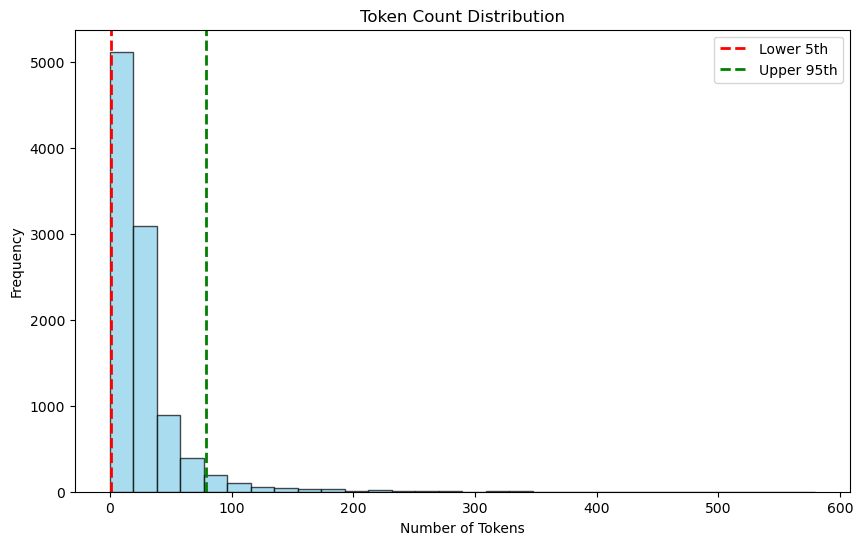


Short outliers: 68
Long outliers: 489

Short Outlier 1: (0 tokens)
Text: 

Short Outlier 2: (0 tokens)
Text: d

Short Outlier 3: (0 tokens)
Text: 

Short Outlier 4: (0 tokens)
Text: 

Short Outlier 5: (0 tokens)
Text: 

Long Outlier 1: (111 tokens)
Text: short review: decent breads and starters, bad shaam savera, a little screwed up daal makhni (but should be a one-off case) better ambience at night... and importantly good quantity! i wanted to give a . but that is not an option extensive... ambience: it is better at night. friends who had been here during the day didn not like it much. so if you prefer ambience, go at night! food! ordered a hara bhara kebab, shaam savera, daal makhni, rotis and raita (yes! i am a vegetarian ) the good part! quantity i was excited to see shaam savera on their menu. but take it from me, you do not want to order it. it is no where close to what it should be. they messed it up real bad, especially the colors. the daal makhni had big chunks of garlic clov

In [7]:
def detect_length_outliers(df, text_column="lemmatized", lower_percentile=5, upper_percentile=95):
    """
    Detects and removes reviews with extreme token counts based on percentile thresholds.

    Parameters:
        df (pd.DataFrame): The dataset containing tokenized words.
        text_column (str): The column with tokenized word lists.
        lower_percentile (int): Percentile threshold for short reviews.
        upper_percentile (int): Percentile threshold for long reviews.

    Returns:
        pd.DataFrame: A DataFrame with outliers removed.
        dict: Token length statistics.
    """
    if text_column not in df.columns:
        raise ValueError(f"Column '{text_column}' not found in DataFrame")

    df = df.copy()

    def count_tokens(tokens):
        """Counts tokens in a review, handling nested lists if present."""
        if isinstance(tokens, list):
            return sum(len(sublist) for sublist in tokens) if tokens and isinstance(tokens[0], list) else len(tokens)
        return 0

    df['num_tokens'] = df[text_column].apply(count_tokens)

    # Compute outlier thresholds
    lower_threshold = np.percentile(df['num_tokens'], lower_percentile)
    upper_threshold = np.percentile(df['num_tokens'], upper_percentile)

    print("\nToken Count Analysis:")
    print(f"Lower Threshold: {lower_threshold:.2f} tokens ({lower_percentile}th percentile)")
    print(f"Upper Threshold: {upper_threshold:.2f} tokens ({upper_percentile}th percentile)")

    # Identify outliers
    df['is_outlier'] = (df['num_tokens'] < lower_threshold) | (df['num_tokens'] > upper_threshold)
    num_outliers = df['is_outlier'].sum()
    
    print(f"Total outliers detected: {num_outliers}")

    # Plot token distribution
    plt.figure(figsize=(10, 6))
    plt.hist(df['num_tokens'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(lower_threshold, color='red', linestyle='dashed', linewidth=2, label=f'Lower {lower_percentile}th')
    plt.axvline(upper_threshold, color='green', linestyle='dashed', linewidth=2, label=f'Upper {upper_percentile}th')
    plt.title('Token Count Distribution')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Display examples
    df_short = df[df['num_tokens'] < lower_threshold]
    df_long = df[df['num_tokens'] > upper_threshold]

    print(f"\nShort outliers: {len(df_short)}")
    print(f"Long outliers: {len(df_long)}")

    for i, (idx, row) in enumerate(df_short.head(5).iterrows(), 1):
        print("=" * 50)
        print(f"\nShort Outlier {i}: ({row['num_tokens']} tokens)")
        print("=" * 50)
        print(f"Text: {row.get('original_text', row[text_column])}")

    for i, (idx, row) in enumerate(df_long.head(5).iterrows(), 1):
        print("=" * 50)
        print(f"\nLong Outlier {i}: ({row['num_tokens']} tokens)")
        print("=" * 50)
        print(f"Text: {row.get('original_text', row[text_column])}")

    # Remove outliers
    df_clean = df[~df['is_outlier']].drop(columns=['is_outlier'])
    num_removed = len(df) - len(df_clean)
    
    print(f"\nFinal dataset size: {len(df_clean)} (removed {num_removed} rows).")

    return df_clean, {
        "lower_threshold": lower_threshold,
        "upper_threshold": upper_threshold,
        "total_outliers": num_outliers,
        "short_outliers_removed": len(df_short),
        "long_outliers_removed": len(df_long)
    }

df_clean, token_stats = detect_length_outliers(df_lemmatized)

## **Step 9: Word Cloud Visualization**  

### **Overview**  
A **word cloud** is a visual representation of the most frequent words in a dataset. Larger words appear more frequently, providing insight into key terms within the dataset.  

At the end of this step, you should evaluate whether the most frequent words align with expectations for text classification or if additional preprocessing is needed.  

This function will:  
- **Extract words** from the dataset while handling different formats (lists or strings).  
- **Generate a word cloud** to highlight the most frequent words.  
- **Display the word cloud** for visual analysis.  
- **Create a horizontal bar chart** of the top 20 words for additional insights.  

## **Key Checks and Actions**  

### **1. Extracting Words for Visualization**  
- **Purpose:** Collects all words from the dataset for word cloud generation.  
- **Action:** Iterates through the dataset, ensuring only valid words are included while filtering out invalid entries.  

**Ask yourself:**  
- Are the extracted words relevant to the classification task?  
- Are there unexpected or unnecessary words appearing frequently?  

### **2. Creating the Word Cloud**  
- **Purpose:** Generates a visualization of word frequency.  
- **Action:** Uses `WordCloud` to create a graphical representation of common words based on their frequency.  

**Ask yourself:**  
- Do the most frequent words align with the dataset's key themes?  
- Should certain words be removed before classification (e.g., frequent but unhelpful words)?  

### **3. Handling Missing or Invalid Data**  
- **Purpose:** Ensures that word cloud generation does not fail due to missing or unexpected values.  
- **Action:** Skips non-string entries and logs warnings for any unexpected data types.  

**Ask yourself:**  
- Are there warnings about missing or unexpected values?  
- Should additional preprocessing be done to clean the tokenized data?  

### **4. Reviewing the Word Cloud and Bar Chart Output**  
- **Purpose:** Helps visually confirm if text preprocessing is effective.  
- **Action:**  
  - Displays the **word cloud** to identify dominant words.  
  - Generates a **bar chart** showing the top 20 most frequent words for additional insights.  

**Ask yourself:**  
- Do the most prominent words make sense for classification?  
- Are there high-frequency words that should be removed to improve model performance?  

### **5. Deciding Next Steps**  
At this stage, you should determine if any further preprocessing is necessary based on the word cloud insights.  

- If **the most frequent words align with classification goals**, proceed with feature extraction.  
- If **unimportant words dominate the visualization**, consider additional filtering or stopword removal.  
- If **irrelevant words are present**, check preprocessing steps for potential refinements.  

By the end of this step, you should have a clear visual understanding of the dominant words in your dataset and whether further text cleaning is required before classification.  


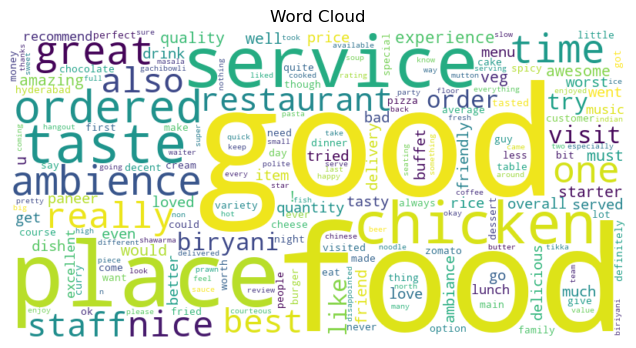

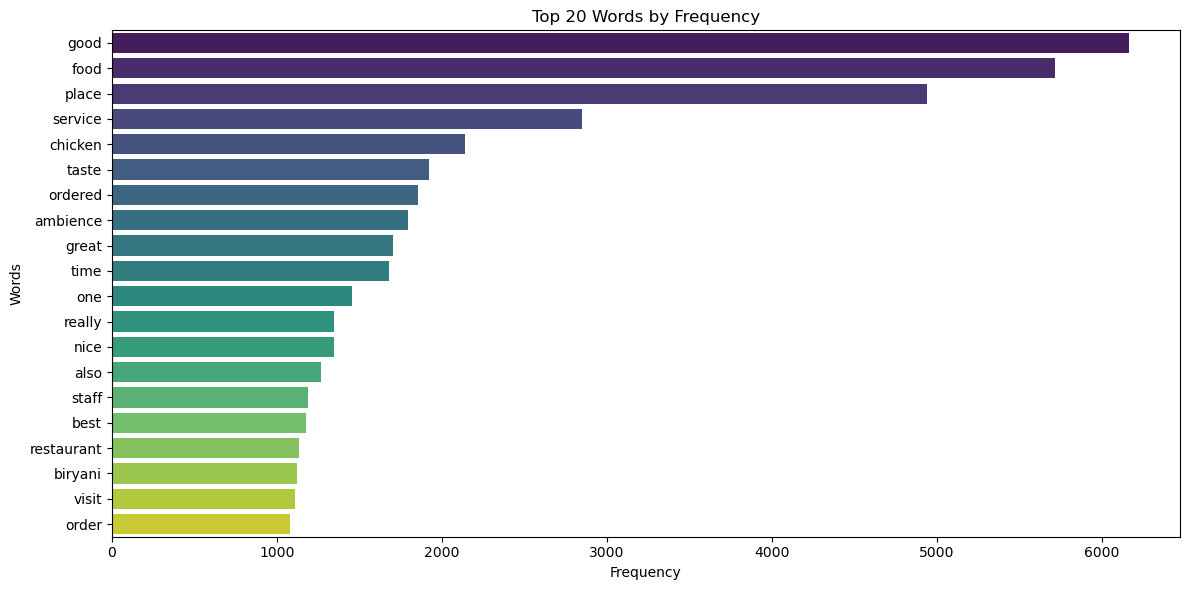

In [8]:
def generate_word_cloud(df, text_column="lemmatized", width=800, height=400,
                        background_color='white', colormap='viridis', max_words=200,
                        contour_color='black', contour_width=1):
    """
    Generates and displays a word cloud from the processed text data.
    Also creates a horizontal bar chart for the top 20 words.

    Parameters:
      - df: Pandas DataFrame containing text data.
      - text_column: Column name containing tokenized text (as lists or strings).
      - width, height: Dimensions of the word cloud.
      - background_color: Background color of the word cloud.
      - colormap: Color map for the word cloud.
      - max_words: Maximum number of words to include.
      - contour_color, contour_width: Color and width of word cloud contour.

    Returns:
      - wordcloud: Generated WordCloud object.
      - word_counts: Dictionary with word frequencies.
    """
    word_counts = Counter()

    # Extract and count words
    for tokens in df[text_column].dropna():
        if isinstance(tokens, list):
            word_counts.update(word for word in tokens if isinstance(word, str))
        elif isinstance(tokens, str):
            word_counts.update(tokens.split())
        else:
            print(f"Warning: Skipping unexpected data type {type(tokens)} in '{text_column}'.")

    if not word_counts:
        print("No valid words found to generate a word cloud.")
        return None, {}

    # Generate word cloud
    wordcloud = WordCloud(width=width, height=height, background_color=background_color,
                          colormap=colormap, max_words=max_words,
                          contour_color=contour_color, contour_width=contour_width
                         ).generate_from_frequencies(word_counts)

    # Display the word cloud
    plt.figure(figsize=(width / 100, height / 100))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud")
    plt.show()

    # Horizontal Bar Chart for Top 20 Words
    top_words = word_counts.most_common(20)
    top_df = pd.DataFrame(top_words, columns=["words", "freqs"])

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=top_df, x="freqs", y="words", hue="words", palette="viridis", dodge=False)
    
    if ax.get_legend():
        ax.legend_.remove()

    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.title("Top 20 Words by Frequency")
    plt.tight_layout()
    plt.show()

    return wordcloud, word_counts

wc, word_frequencies = generate_word_cloud(df_clean)